In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# using pandas modify csv
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/NHIS 2007 data.csv')

# remove extremes from entries who did not awnser survey
df = df[df.weight <= 900]
df = df[df.height <= 90]

# get weights and heights
X = df['height']
y = df['weight']

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# set data frame objects to numpy arrays
# try-except is here because colab saves the varables if cells need to be rerun
try:
  X = X.to_numpy(copy=True)
  y = y.to_numpy(copy=True)
except:
  print(type(X), type(y))

def lin_regress(X, y, size):
  Y = lambda b0, b1, x: b0 + b1*x
  
  # reduce size   
  X = np.resize(X, (size,))
  y = np.resize(y, (size,)) 
  
  # set domain
  dom = np.linspace(59, 76, 100)

  A = np.power(X[np.newaxis].T, [0, 1])
  b = np.linalg.lstsq(A, y, rcond=None)[0]

  vals = Y(b[0], b[1], dom)

  # plot
  fig, ax = plt.subplots(1,1)

  ax.plot(X, y, 'ob')
  ax.plot(dom, vals, '-r')

  ax.set_xlabel('Height in inches')
  ax.set_ylabel('Wieght in pounds') 
  
  print(stats.pearsonr(X, y))
  return vals

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


A smaple of 100 persons


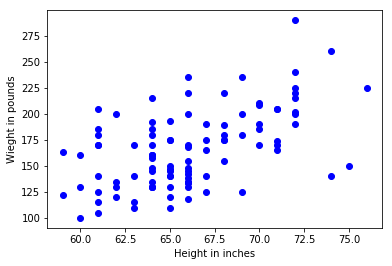

In [5]:
# plot
fig, ax = plt.subplots(1,1)

ax.plot(np.resize(X, (100,)), np.resize(y, (100,)), 'ob')
ax.set_xlabel('Height in inches')
ax.set_ylabel('Wieght in pounds')

print("A smaple of 100 persons")

(0.7967813763183067, 0.10655564689829226)
(0.4766794237225529, 0.00046593523852551407)
(0.5409956393620496, 6.214132981415247e-09)
(0.5205642628391054, 4.522590384470167e-36)
(0.5110420111669969, 1.2533833037513397e-67)


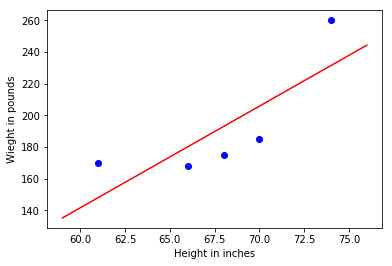

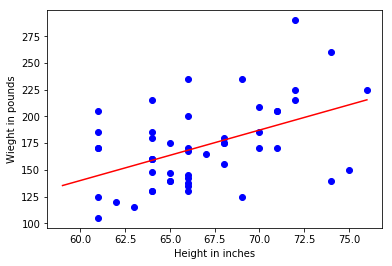

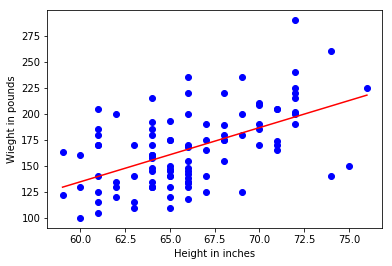

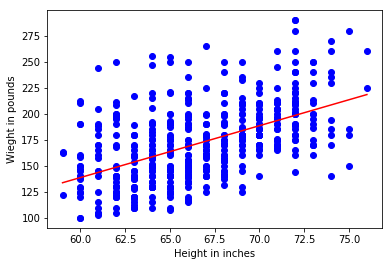

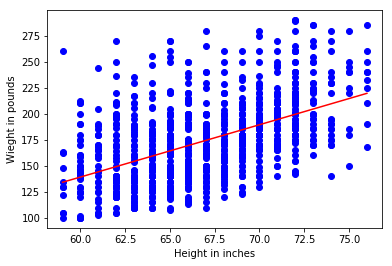

In [9]:
five = lin_regress(X, y, 5)
fifty = lin_regress(X, y, 50)
one_hundred = lin_regress(X, y, 100)
five_hundred = lin_regress(X, y, 500)
one_thousand = lin_regress(X, y, 1000)

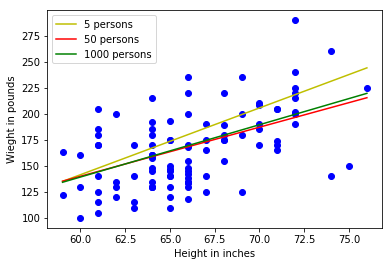

In [7]:
# set domain
dom = np.linspace(59, 76, 100)

# plot
fig, ax = plt.subplots(1,1)

ax.plot(np.resize(X, (100,)), np.resize(y, (100,)), 'ob')
ax.plot(dom, five, '-y', label='5 persons')
ax.plot(dom, fifty, '-r', label='50 persons')
ax.plot(dom, one_thousand, '-g', label='1000 persons')

ax.set_xlabel('Height in inches')
ax.set_ylabel('Wieght in pounds')

ax.legend()